In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline  
from scipy.stats import kurtosis, skew
from time import time

from xgboost import XGBClassifier



In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_predict, validation_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [3]:
df= pd.read_excel(r'C:\Users\user\Desktop\DataScience_2025\loan_data.xlsx')

In [4]:
df.head()

,age,gender,education,income,person_emp_exp,home_ownership,loan_amount,loan_intent,loan_int_rate,loan_percent_of_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [5]:
df.dtypes

age                                 int64
gender                             object
education                          object
income                              int64
person_emp_exp                      int64
home_ownership                     object
loan_amount                         int64
loan_intent                        object
loan_int_rate                     float64
loan_percent_of_income            float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [6]:
df.shape

(45000, 14)

In [7]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [8]:
df.describe()

,age,income,person_emp_exp,loan_amount,loan_int_rate,loan_percent_of_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [9]:
df.isnull().sum()

age                               0
gender                            0
education                         0
income                            0
person_emp_exp                    0
home_ownership                    0
loan_amount                       0
loan_intent                       0
loan_int_rate                     0
loan_percent_of_income            0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [10]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [11]:
df['education'].value_counts()

education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

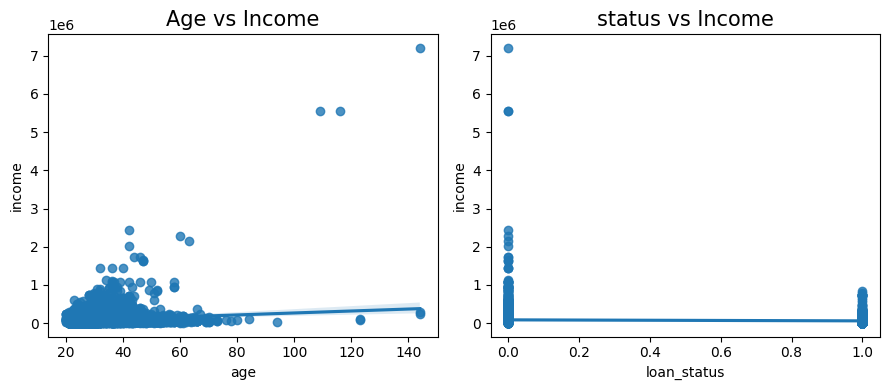

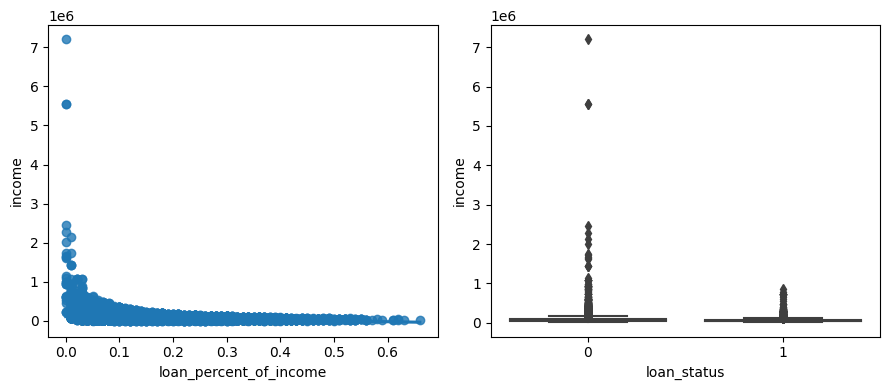

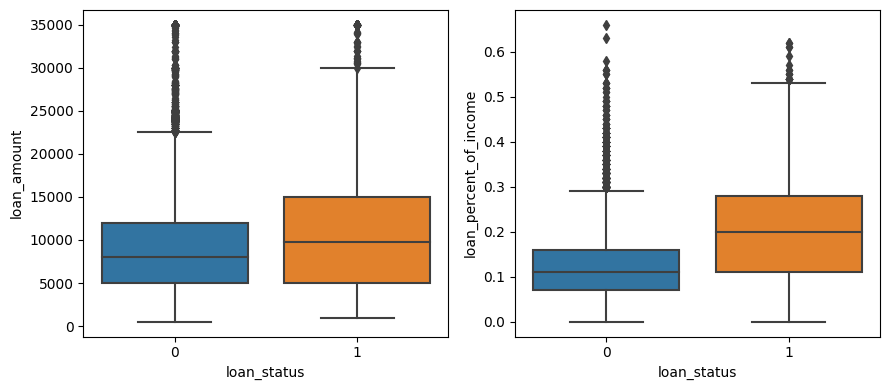

In [12]:
bigfig= plt.figure(figsize=(12,6))
(top, middle, bottom)= bigfig.subfigures(3,1, wspace=.5, hspace=.5)

# Top figures
top.subplots_adjust(left=.1, right=.9)

fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(9,4))

ax1= sns.regplot(x= 'age', y= 'income', data=df, ax=ax1)
ax1.set_title('Age vs Income', size=15)

ax2= sns.regplot(x= 'loan_status', y= 'income', data=df, ax=ax2)
ax2.set_title('status vs Income', size=15)

plt.tight_layout()

# Middle figures
middle.subplots_adjust(left=.1, right=.9)

fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize=(9,4))
ax1= sns.regplot(x= 'loan_percent_of_income', y= 'income', data=df, ax=ax1)

ax2=sns.boxplot(x='loan_status',y= 'income', data=df, ax=ax2)

plt.tight_layout()

#Bottom figure
bottom.subplots_adjust(left=.1, right=.9)

fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(9,4))

ax1= sns.boxplot(x='loan_status',y= 'loan_amount', data=df, ax=ax1)

ax2= sns.boxplot(x='loan_status',y= 'loan_percent_of_income', data=df, ax= ax2)

plt.tight_layout()


In [13]:
print( df[['income', 'loan_status']].corr())
print( df[['income', 'age']].corr())
print( df[['income', 'loan_amount']].corr())
print( df[['age', 'loan_amount']].corr())
print( df[['loan_percent_of_income', 'loan_amount']].corr())
print( df[['credit_score', 'loan_amount']].corr())
print( df[['person_emp_exp', 'loan_amount']].corr())
print( df[['loan_percent_of_income', 'loan_amount']].corr())
print( df[['loan_percent_of_income', 'income']].corr())
print( df[['loan_percent_of_income', 'loan_status']].corr())
print( df[['credit_score', 'income']].corr())
print( df[['loan_status', 'cb_person_cred_hist_length']].corr())




               income  loan_status
income       1.000000    -0.135808
loan_status -0.135808     1.000000
          income       age
income  1.000000  0.193698
age     0.193698  1.000000
              income  loan_amount
income       1.00000      0.24229
loan_amount  0.24229      1.00000
                 age  loan_amount
age          1.00000      0.05075
loan_amount  0.05075      1.00000
                        loan_percent_of_income  loan_amount
loan_percent_of_income                1.000000     0.593011
loan_amount                           0.593011     1.000000
              credit_score  loan_amount
credit_score      1.000000     0.009074
loan_amount       0.009074     1.000000
                person_emp_exp  loan_amount
person_emp_exp        1.000000     0.044589
loan_amount           0.044589     1.000000
                        loan_percent_of_income  loan_amount
loan_percent_of_income                1.000000     0.593011
loan_amount                           0.593011     1.00000

<Axes: xlabel='loan_intent', ylabel='income'>

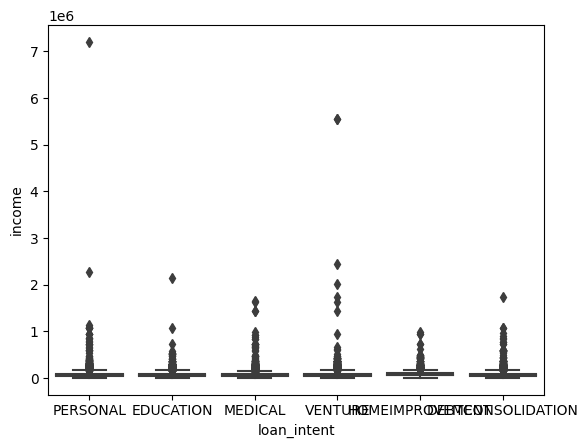

In [14]:
sns.boxplot(x='loan_intent',y= 'income', data=df)

<Axes: xlabel='loan_intent', ylabel='count'>

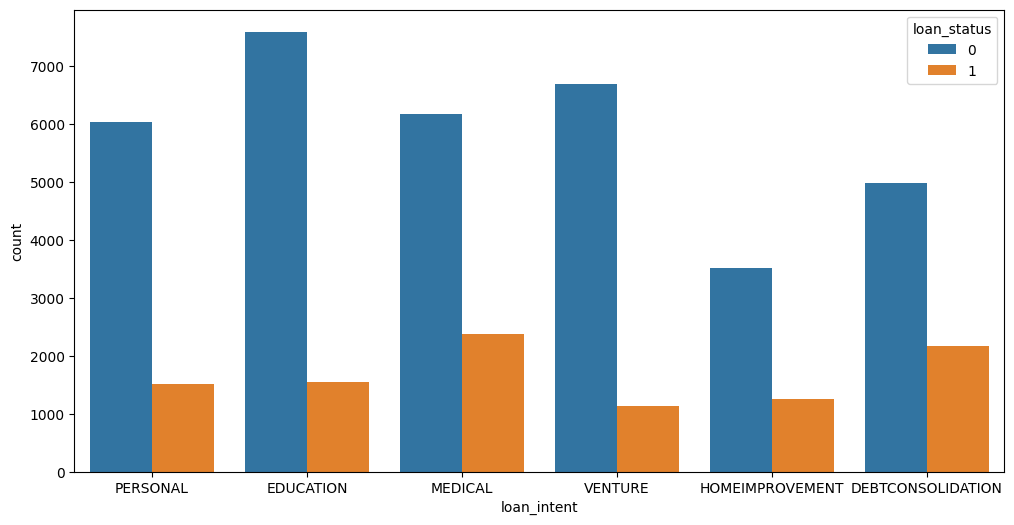

In [15]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x='loan_intent', hue='loan_status', data=df)

<Axes: xlabel='previous_loan_defaults_on_file', ylabel='income'>

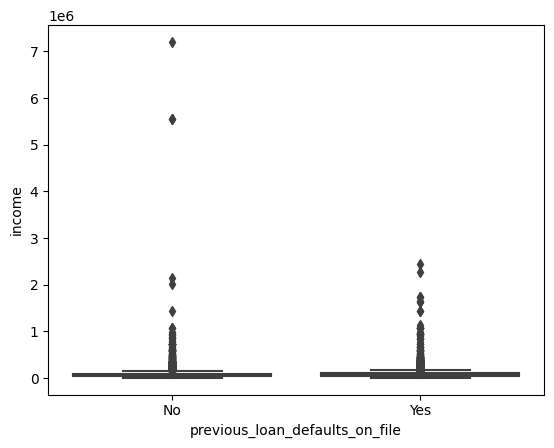

In [16]:
sns.boxplot(x='previous_loan_defaults_on_file',y= 'income', data=df)

In [17]:
df_group_based_on_intent= df[['loan_status', 'loan_intent', 'loan_amount', 'loan_percent_of_income', 'income']]

df_group_based_on_intent= df_group_based_on_intent.groupby(['loan_intent'], as_index=True).mean()
df_group_based_on_intent

,loan_status,loan_amount,loan_percent_of_income,income
loan_intent,,,,
DEBTCONSOLIDATION,0.302729,9548.333660,0.139418,80608.216935
EDUCATION,0.169562,9507.405987,0.139547,77765.025019
HOMEIMPROVEMENT,0.263015,10419.187330,0.135779,89148.745766
MEDICAL,0.278194,9137.959172,0.143425,73414.871900
PERSONAL,0.201404,9603.918432,0.138227,83030.910222
VENTURE,0.144264,9658.897429,0.140029,82571.965852


<Axes: ylabel='count'>

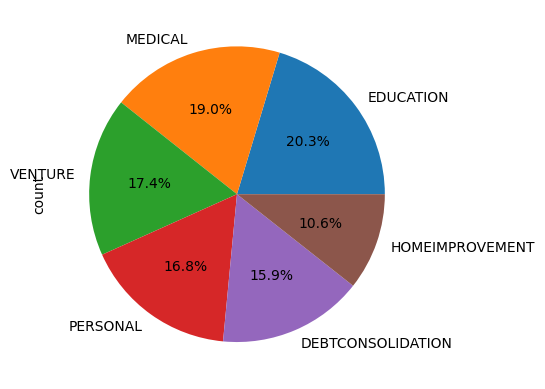

In [18]:
df['loan_intent'].value_counts().plot(kind='pie', autopct="%1.1f%%")

In [19]:
df['income_group'] = pd.qcut(df['income'], q=4, labels=['Low','Medium','High','Very High'])
df.groupby('income_group')['loan_status'].mean()

income_group
Low          0.403733
Medium       0.220514
High         0.172104
Very High    0.092533
Name: loan_status, dtype: float64

<Axes: ylabel='count'>

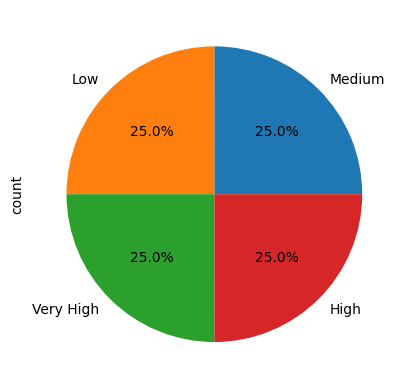

In [20]:
df['income_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='age', ylabel='Density'>

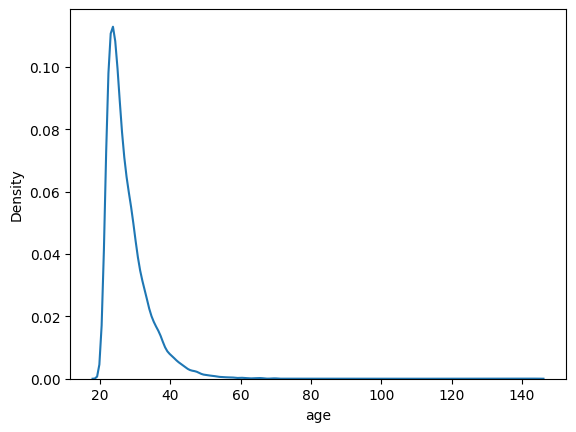

In [21]:
sns.kdeplot(data= df, x= 'age')

<Axes: ylabel='Count'>

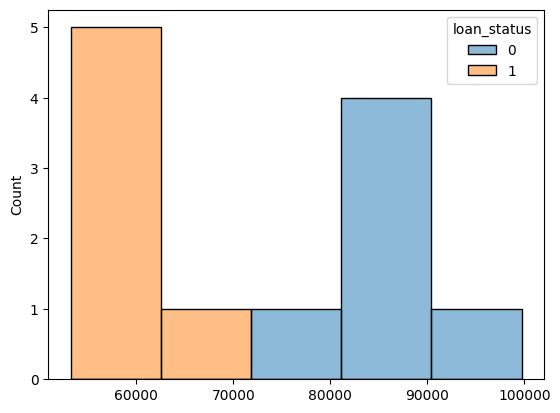

In [22]:
loan_vs_income_mean= df.pivot_table(index='loan_intent', columns= 'loan_status', values='income', aggfunc= 'mean')
sns.histplot(data=loan_vs_income_mean)

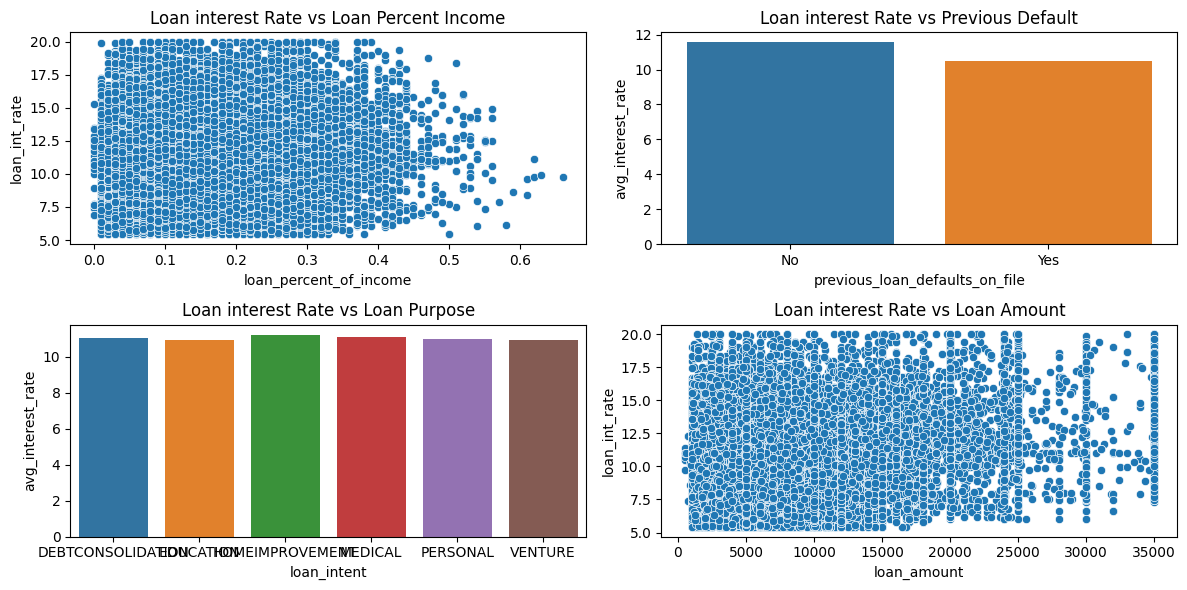

In [23]:
int_rate_default= df.groupby('previous_loan_defaults_on_file')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')

int_rate_purpose= df.groupby('loan_intent')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')
#######

## Figures
fig, ax= plt.subplots(2, 2, figsize=(12,6))

sns.scatterplot(data= df, x='loan_percent_of_income', y='loan_int_rate', ax=ax[0,0])
ax[0,0].set_title('Loan interest Rate vs Loan Percent Income')

sns.barplot(data= int_rate_default, x='previous_loan_defaults_on_file', y= 'avg_interest_rate', ax=ax[0,1])
ax[0,1].set_title('Loan interest Rate vs Previous Default')

sns.barplot(data= int_rate_purpose, x='loan_intent', y= 'avg_interest_rate', ax=ax[1,0])
ax[1,0].set_title('Loan interest Rate vs Loan Purpose')

sns.scatterplot(data= df, x='loan_amount', y='loan_int_rate')
ax[1,1].set_title('Loan interest Rate vs Loan Amount')


plt.tight_layout()

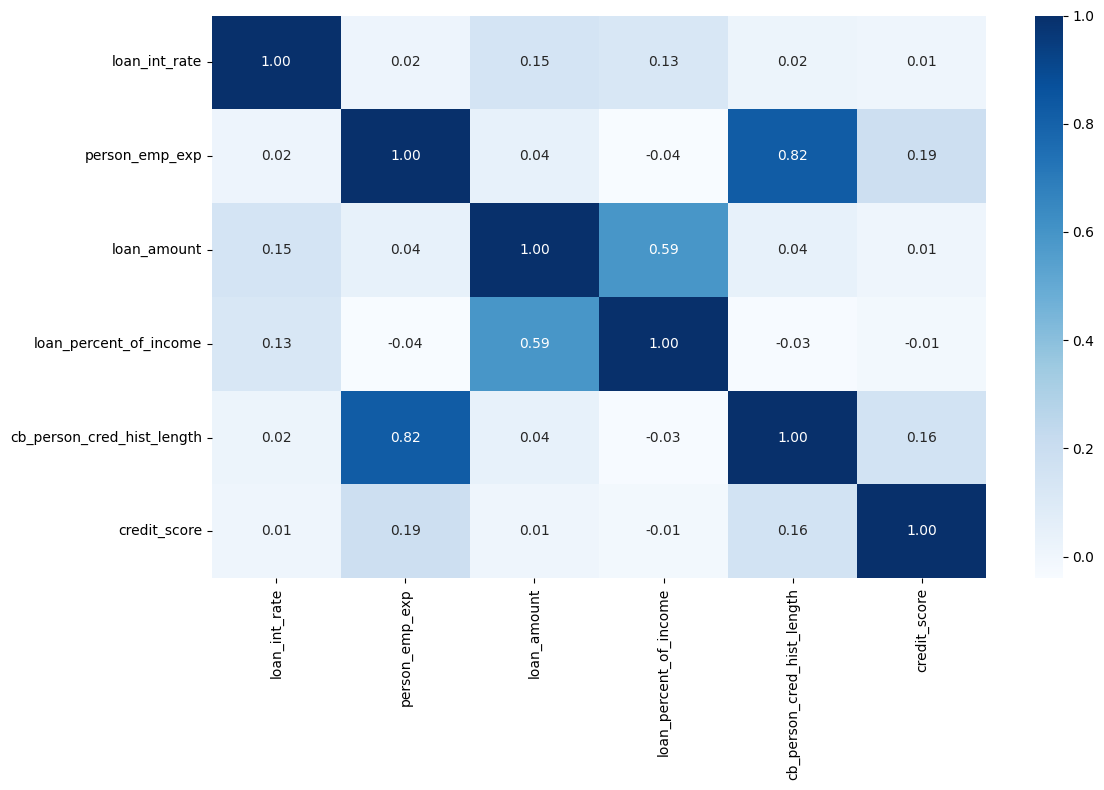

In [24]:
selected_features= ['loan_int_rate',
                    'person_emp_exp',
                    'loan_amount',
                    'loan_percent_of_income',
                    'cb_person_cred_hist_length', 
                    'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(df[selected_features].corr(method='pearson'),annot=True, fmt='.2f', cmap='Blues')

plt.tight_layout()

In [25]:
num_features_one= ['age', 'income', 'person_emp_exp']

for col in num_features_one:
    print(f"Skwness of {col}: {skew(df[col])}")
    print(f'6 of {col}: {kurtosis(df[col])}\n')

Skwness of age: 2.5480690657849285
6 of age: 18.64724355494631

Skwness of income: 34.13644520299569
6 of income: 2398.418123917783

Skwness of person_emp_exp: 2.594830874585158
6 of person_emp_exp: 19.166060676086243



<Axes: xlabel='age', ylabel='Count'>

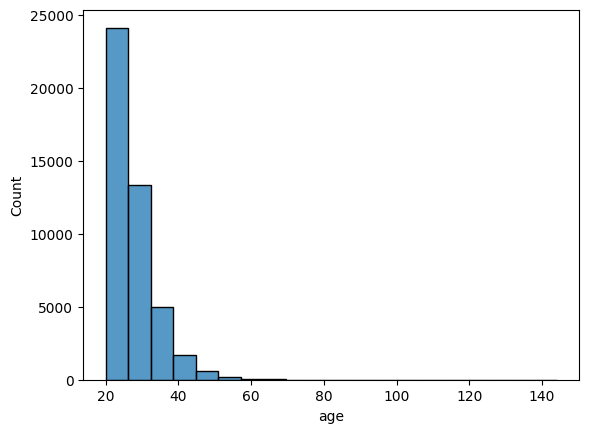

In [26]:
sns.histplot(x= 'age', data=df, bins= 20)

Outliers

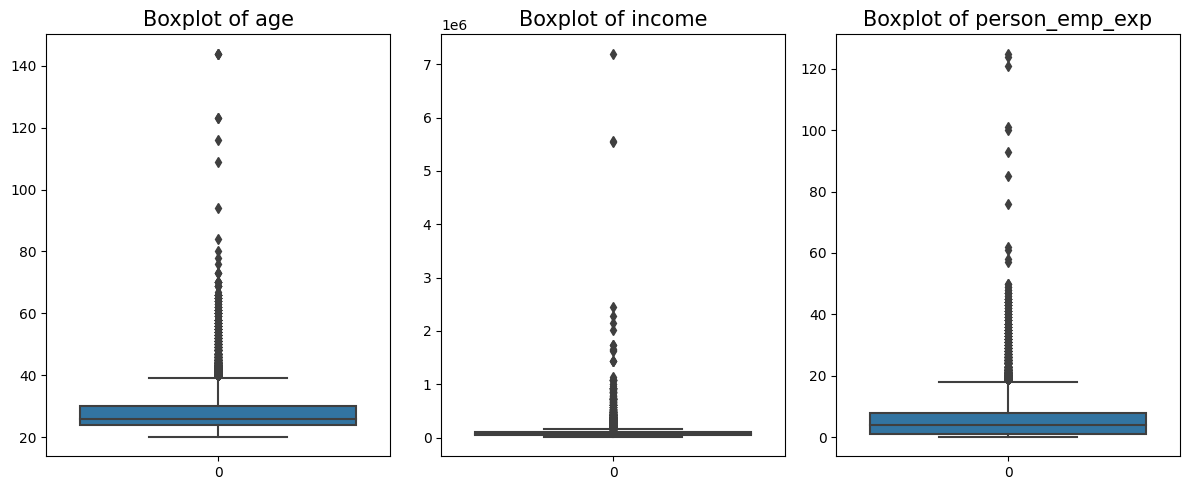

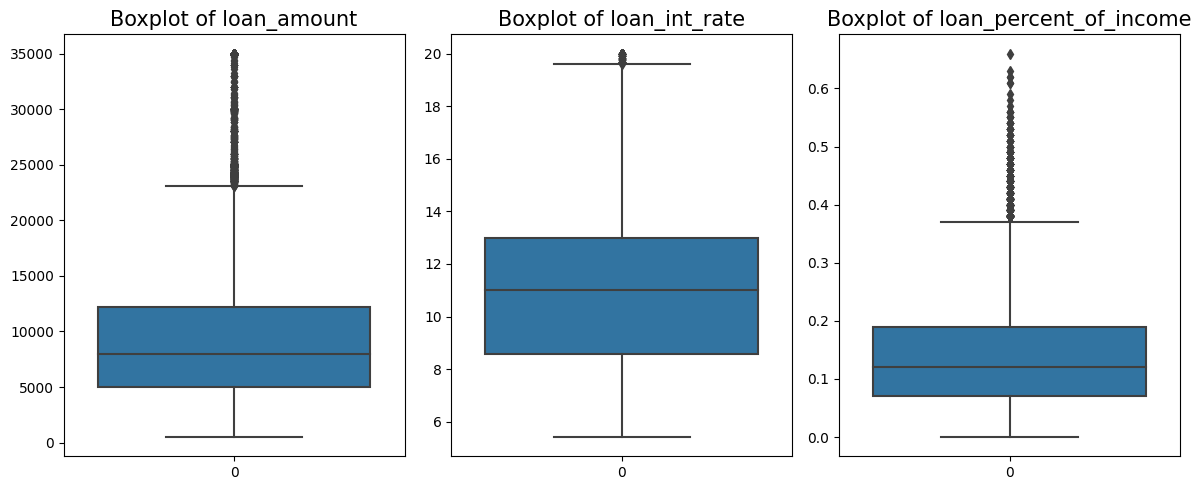

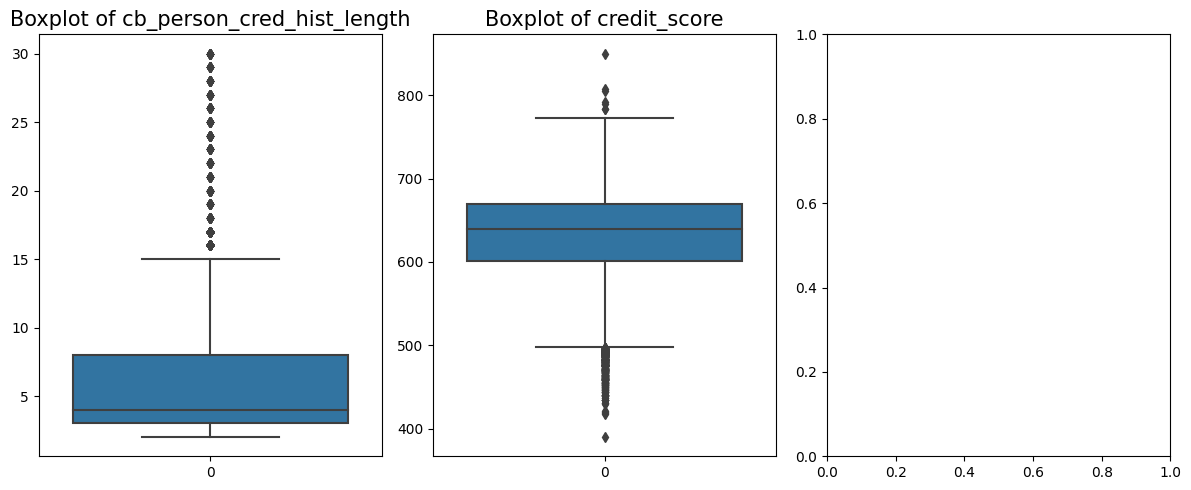

In [27]:
num_features= [col for col in df.columns if df[col].dtypes != 'O']
num_features.remove('loan_status')
num_features.remove('income_group')


def plot_boxplots(df):

    for i in range(3):

        fig, (ax1,ax2,ax3)= plt.subplots(ncols=3, figsize=(12,5))
        ax1= sns.boxplot(df[num_features[i*3]], ax=ax1) 
        ax1.set_title('Boxplot of '+str(num_features[i*3]), fontsize=15)

        ax2= sns.boxplot(df[num_features[i*3+1]], ax=ax2)
        ax2.set_title('Boxplot of '+str(num_features[i*3+1]), fontsize=15)
        if i< 2:
            ax3= sns.boxplot(df[num_features[i*3+2]], ax= ax3)
            ax3.set_title('Boxplot of '+str(num_features[i*3+2]), fontsize=15)

        plt.tight_layout()

plot_boxplots(df)        


In [28]:
def outliers_percentage(df):

    outliers_perc= []

    for k,v in df.items():
        # Colunms must be of numeric type
        if df[k].dtypes != 'O':
            q1= v.quantile(0.25)
            q3= v.quantile(0.75)
            iqr= q3 - q1
            v_col= v[(v <= q1 - 1.5 * iqr) | (v>= q3 + 1.5 * iqr)]
            prec= np.shape(v_col)[0] * 100 / np.shape(df)[0]
            out_tuple= (k, int(prec))
            outliers_perc.append(out_tuple)
            print('Column %s outliers= %.2f%%' % (k,prec))

outliers_percentage(df[num_features])

Column age outliers= 5.73%
Column income outliers= 4.93%
Column person_emp_exp outliers= 3.83%
Column loan_amount outliers= 5.22%
Column loan_int_rate outliers= 0.28%
Column loan_percent_of_income outliers= 2.00%
Column cb_person_cred_hist_length outliers= 3.04%
Column credit_score outliers= 1.04%


***Data Preprocessing***

In [29]:
def remove_outliers_iqr(df, column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    iqr= q3 - q1
    lower_bound= q1 - 1.5 * iqr
    upper_bound= q3 + 1.5 * iqr

    # Filter the data
    filterd_data= df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filterd_data

capped_data= df.copy()

for col in num_features:
    capped_data= remove_outliers_iqr(capped_data, col)

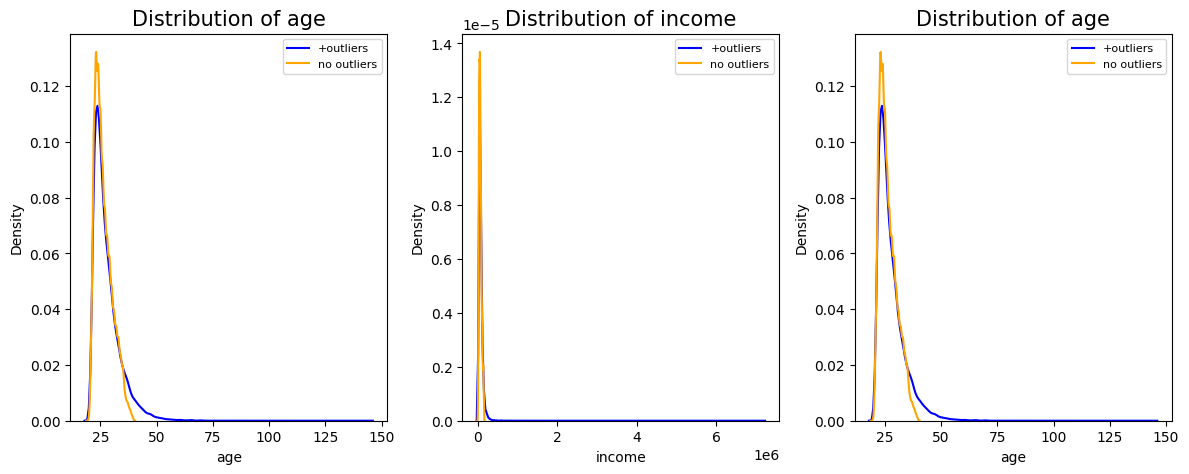

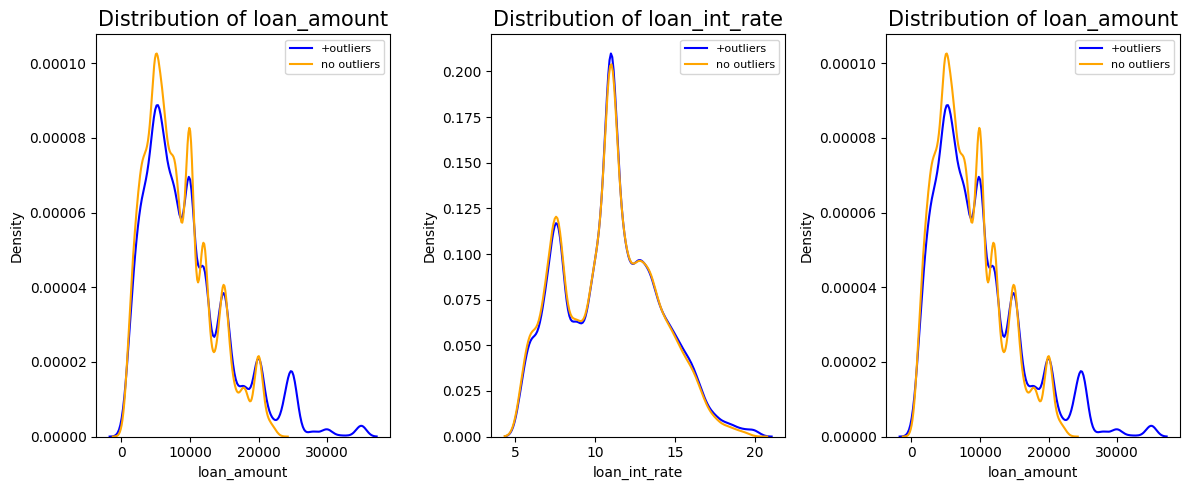

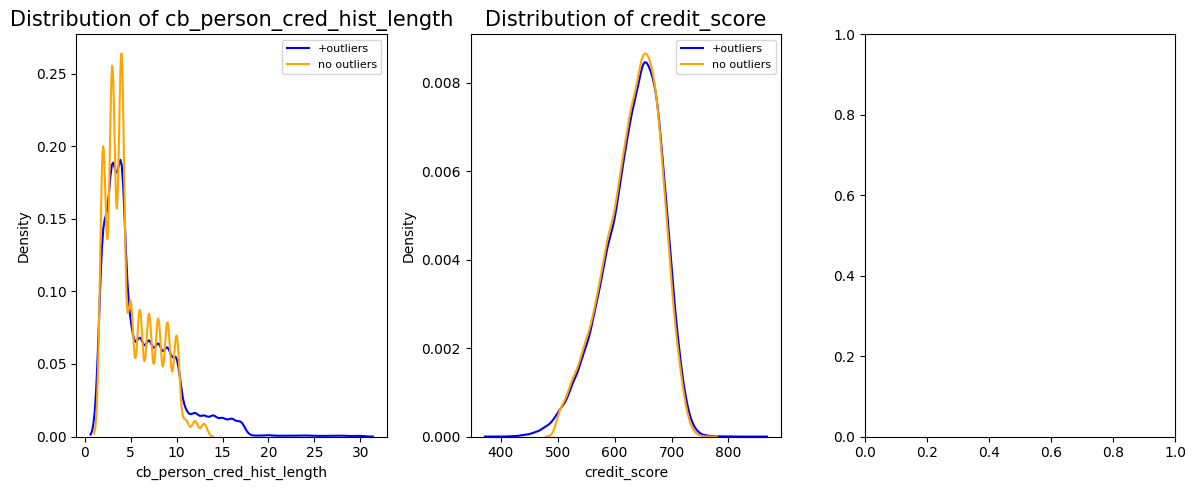

In [30]:
def plot_distrubtion(df, capped_data):

    for i in range(3):
        fig, (ax1,ax2,ax3)= plt.subplots(ncols=3, figsize= (12,5))

        ax1= sns.kdeplot(df[num_features[i*3]],ax=ax1, label= '+outliers', color= 'blue')
        ax1= sns.kdeplot(capped_data[num_features[i*3]], ax=ax1, label= 'no outliers', color= 'orange')
        ax1.set_title('Distribution of '+ str(num_features[i*3]), fontsize=15)
        ax1.legend(fontsize=8, loc= 'upper right')

        ax2= sns.kdeplot(df[num_features[i*3+1]], ax=ax2, label= '+outliers', color='blue')
        ax2= sns.kdeplot(capped_data[num_features[i*3+1]], ax=ax2, label= 'no outliers', color= 'orange')
        ax2.set_title('Distribution of '+ str(num_features[i*3+1]), fontsize=15)
        ax2.legend(fontsize=8, loc= 'upper right')

        if i <2:
            ax3= sns.kdeplot(df[num_features[i*3]], ax=ax3, label= '+outliers', color= 'blue')
            ax3= sns.kdeplot(capped_data[num_features[i*3]], ax=ax3, label= 'no outliers', color= 'orange')
            ax3.set_title('Distribution of '+str(num_features[i*3]), fontsize=15)
            ax3.legend(fontsize=8, loc='upper right')

        plt.tight_layout()

plot_distrubtion(df, capped_data)

In [31]:
print('##### Skewness and kurtosis after outliers capping ##### \n')

for col in num_features:
    print(f'Skewness of {col}: {skew(capped_data[col])}')
    print(f'Kurtosis of {col}: {kurtosis(capped_data[col])}\n')

##### Skewness and kurtosis after outliers capping ##### 

Skewness of age: 0.8332576383223101
Kurtosis of age: -0.00044276170210322263

Skewness of income: 0.7304305154472135
Kurtosis of income: 0.09207264087009515

Skewness of person_emp_exp: 0.8947171977883184
Kurtosis of person_emp_exp: 0.030591506491959297

Skewness of loan_amount: 0.73910383306941
Kurtosis of loan_amount: -0.08602595958290582

Skewness of loan_int_rate: 0.15695724993566545
Kurtosis of loan_int_rate: -0.5732647408021432

Skewness of loan_percent_of_income: 0.6080250250748
Kurtosis of loan_percent_of_income: -0.346650026917696

Skewness of cb_person_cred_hist_length: 0.8477000988338078
Kurtosis of cb_person_cred_hist_length: -0.2499588605626233

Skewness of credit_score: -0.4772494248773158
Kurtosis of credit_score: -0.28698076044001386



In [32]:
print('##### Skewness and kurtosis before outliers capping ##### \n')

for col in num_features_one:
    print(f'Skewness of {col}: {skew(df[col])}')
    print(f'Kurtosis of {col}: {kurtosis(df[col])}\n')

##### Skewness and kurtosis before outliers capping ##### 

Skewness of age: 2.5480690657849285
Kurtosis of age: 18.64724355494631

Skewness of income: 34.13644520299569
Kurtosis of income: 2398.418123917783

Skewness of person_emp_exp: 2.594830874585158
Kurtosis of person_emp_exp: 19.166060676086243



**Label Encoding, Scaling and Train-Test Split**

Train-test split

In [33]:
X= capped_data.drop('loan_status', axis=1)
y= capped_data['loan_status']

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=45)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28852, 14), (7213, 14), (28852,), (7213,))

In [34]:
x_train.head()

,age,gender,education,income,person_emp_exp,home_ownership,loan_amount,loan_intent,loan_int_rate,loan_percent_of_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,income_group
34701,33,female,Master,72923,11,OWN,16000,PERSONAL,12.15,0.22,10,587,Yes,High
4510,24,male,Associate,78850,1,RENT,4800,PERSONAL,7.88,0.06,4,565,Yes,High
20411,29,female,Bachelor,84653,4,RENT,4500,PERSONAL,5.42,0.05,9,641,Yes,High
40552,24,male,Master,31889,3,RENT,6000,DEBTCONSOLIDATION,7.71,0.19,4,682,No,Low
39531,25,male,Master,121396,1,MORTGAGE,20000,HOMEIMPROVEMENT,6.52,0.16,6,710,Yes,Very High


In [35]:
cat_col= [ col for col in x_train.columns if x_train[col].dtypes == 'O' ]

for col in cat_col:
    print(f'Feature: {col}, caedinality {x_train[col].nunique()}')

Feature: gender, caedinality 2
Feature: education, caedinality 5
Feature: home_ownership, caedinality 4
Feature: loan_intent, caedinality 6
Feature: previous_loan_defaults_on_file, caedinality 2


In [36]:
for col in cat_col:
    print(f'{x_train[col].value_counts(normalize=True).reset_index()}\n')

   gender  proportion
0    male    0.547345
1  female    0.452655

     education  proportion
0     Bachelor    0.310897
1    Associate    0.259289
2  High School    0.257105
3       Master    0.162172
4    Doctorate    0.010537

  home_ownership  proportion
0           RENT    0.543047
1       MORTGAGE    0.391377
2            OWN    0.063115
3          OTHER    0.002461

         loan_intent  proportion
0          EDUCATION    0.210731
1            MEDICAL    0.193124
2            VENTURE    0.173333
3           PERSONAL    0.164599
4  DEBTCONSOLIDATION    0.157597
5    HOMEIMPROVEMENT    0.100617

  previous_loan_defaults_on_file  proportion
0                            Yes    0.524435
1                             No    0.475565



In [37]:
x_train.loc[x_train['education'].isin(['Doctorate', 'Master']), 'education']= 'Master&Doctorate'
x_test.loc[x_test['education'].isin(['Doctorate', 'Master']), 'education']= 'Master&Doctorate'

x_train['education'].value_counts(normalize=True).reset_index()

,education,proportion
0,Bachelor,0.310897
1,Associate,0.259289
2,High School,0.257105
3,Master&Doctorate,0.172709


In [38]:
# Catigorical col in the trainin data
object_cols= [col for col in x_train.columns if x_train[col].dtype == 'object']

good_label_cols= [col for col in object_cols if set(x_test[col]).issubset(set(x_train[col]))]

bad_label_cols= list(set(object_cols)-set(good_label_cols))

print('Calegorical columns will be incoded: ',good_label_cols )
print('\n Calegorical columns that will be dropped from the dataset: ', bad_label_cols)

Calegorical columns will be incoded:  ['gender', 'education', 'home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

 Calegorical columns that will be dropped from the dataset:  []


Label encoding

In [39]:
### Ordinal Encoding ###
edu_map= {'Associate': 0, 'High School': 1, 'Bachelor':2, 'Master&Doctorate': 3 }

x_train['education']= x_train['education'].map(edu_map)
x_test['education']= x_test['education'].map(edu_map)


###Label Encoding###
encoder= LabelEncoder()

for col in ['gender', 'previous_loan_defaults_on_file']:
    x_train[col]= encoder.fit_transform(x_train[col])
    x_test[col]= encoder.fit_transform(x_test[col])

In [40]:
cat_features_OH= ['home_ownership', 'loan_intent']

### One-hot encoding ###
oh_encoder= OneHotEncoder(sparse=False, handle_unknown='ignore').set_output(transform='pandas')

# Fit and transform the categorical columns and one-hot encodeing remorve index
OHE_train= pd.DataFrame(oh_encoder.fit_transform(x_train[cat_features_OH]),
                        index=x_train.index)
OHE_test= pd.DataFrame(oh_encoder.transform(x_train[cat_features_OH]),
                       index=x_test.index)

# Remove categorical columns (will replace with one-hot encoding)
num_train= x_train.drop(cat_features_OH, axis=1)
num_test= x_test.drop(cat_features_OH, axis=1)

# Add one-hot ecnoded columns to numerical features
OHE_x_train= pd.concat([num_train, OHE_train],axis=1)
OHE_x_test= pd.concat([num_test, OHE_test], axis=1)


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Scaling

In [41]:
mm_scaler= MinMaxScaler()
std_scaler= StandardScaler()

STD_list= ['age', 'income', 'person_emp_exp', 'loan_amount', 'loan_int_rate', 'loan_percent_of_income', 'cb_person_cred_hist_length', 'credit_score']

OHE_x_train[STD_list]= std_scaler.fit_transform(OHE_x_train[STD_list])
OHE_x_test[STD_list]= std_scaler.transform(OHE_x_test[STD_list])

OHE_x_train.head()

,age,gender,education,income,person_emp_exp,loan_amount,loan_int_rate,loan_percent_of_income,cb_person_cred_hist_length,credit_score,...,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
34701,1.711850,0,3,0.092475,1.796532,1.621274,0.435250,1.261574,1.894818,-0.948221,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4510,-0.618040,1,0,0.280159,-0.789598,-0.724234,-1.023970,-0.971335,-0.373570,-1.409626,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20411,0.676343,0,2,0.463917,-0.013759,-0.787060,-1.864645,-1.110892,1.516753,0.184318,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40552,-0.618040,1,3,-1.206908,-0.272372,-0.472929,-1.082066,0.842904,-0.373570,1.044209,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
39531,-0.359163,1,3,1.627421,-0.789598,2.458956,-1.488733,0.424233,0.382559,1.631452,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


****Model Selection****

In [42]:
OHE_x_train= OHE_x_train.drop('income_group', axis=1 )

In [43]:
# Random Forest 
random_forest= RandomForestClassifier(random_state=1, max_depth=20)
random_forest.fit(OHE_x_train, y_train)

importances= pd.DataFrame({'Features': OHE_x_train.columns, 'Importance': np.round(random_forest.feature_importances_,3)})
importances= importances.sort_values('Importance',ascending=False)
importances.head(15)

,Features,Importance
10,previous_loan_defaults_on_file,0.228
6,loan_int_rate,0.167
7,loan_percent_of_income,0.152
3,income,0.131
9,credit_score,0.055
5,loan_amount,0.053
14,home_ownership_RENT,0.032
0,age,0.030
4,person_emp_exp,0.027
8,cb_person_cred_hist_length,0.024


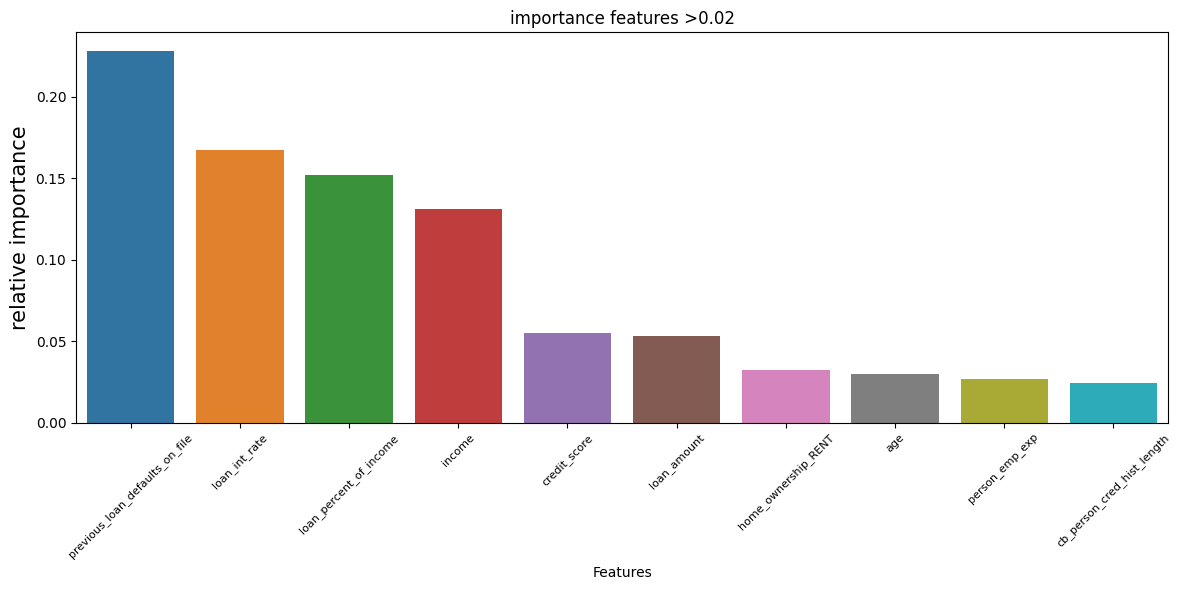

In [44]:
plt.figure(figsize=(12,6))

sns.barplot(importances[importances['Importance']>0.02], x='Features', y='Importance')
plt.title('importance features >0.02')
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('relative importance', fontsize=15)

plt.tight_layout()
plt.show()

In [45]:

num_features_one

['age', 'income', 'person_emp_exp']

correlation heatmap

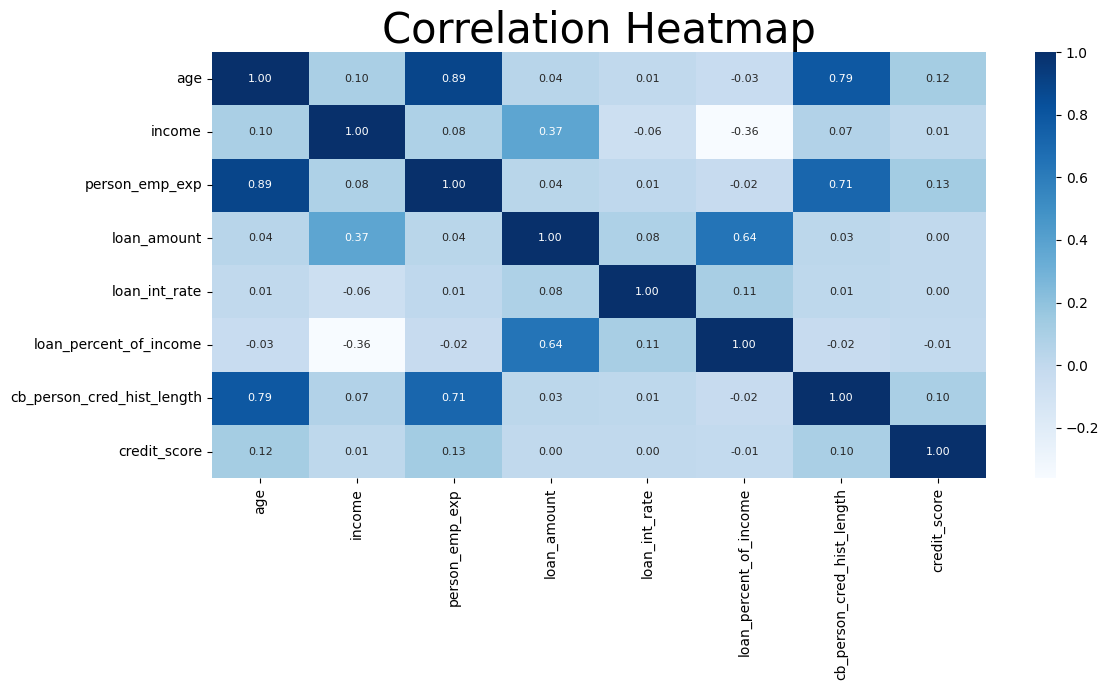

In [46]:
plt.figure(figsize=(12,7))
sns.heatmap(OHE_x_train[num_features].corr(method='pearson'), annot=True, fmt='.2f', annot_kws={'fontsize':8}, cmap='Blues')
plt.title('Correlation Heatmap', fontsize=30)

plt.tight_layout()
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_24900\3542375112.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


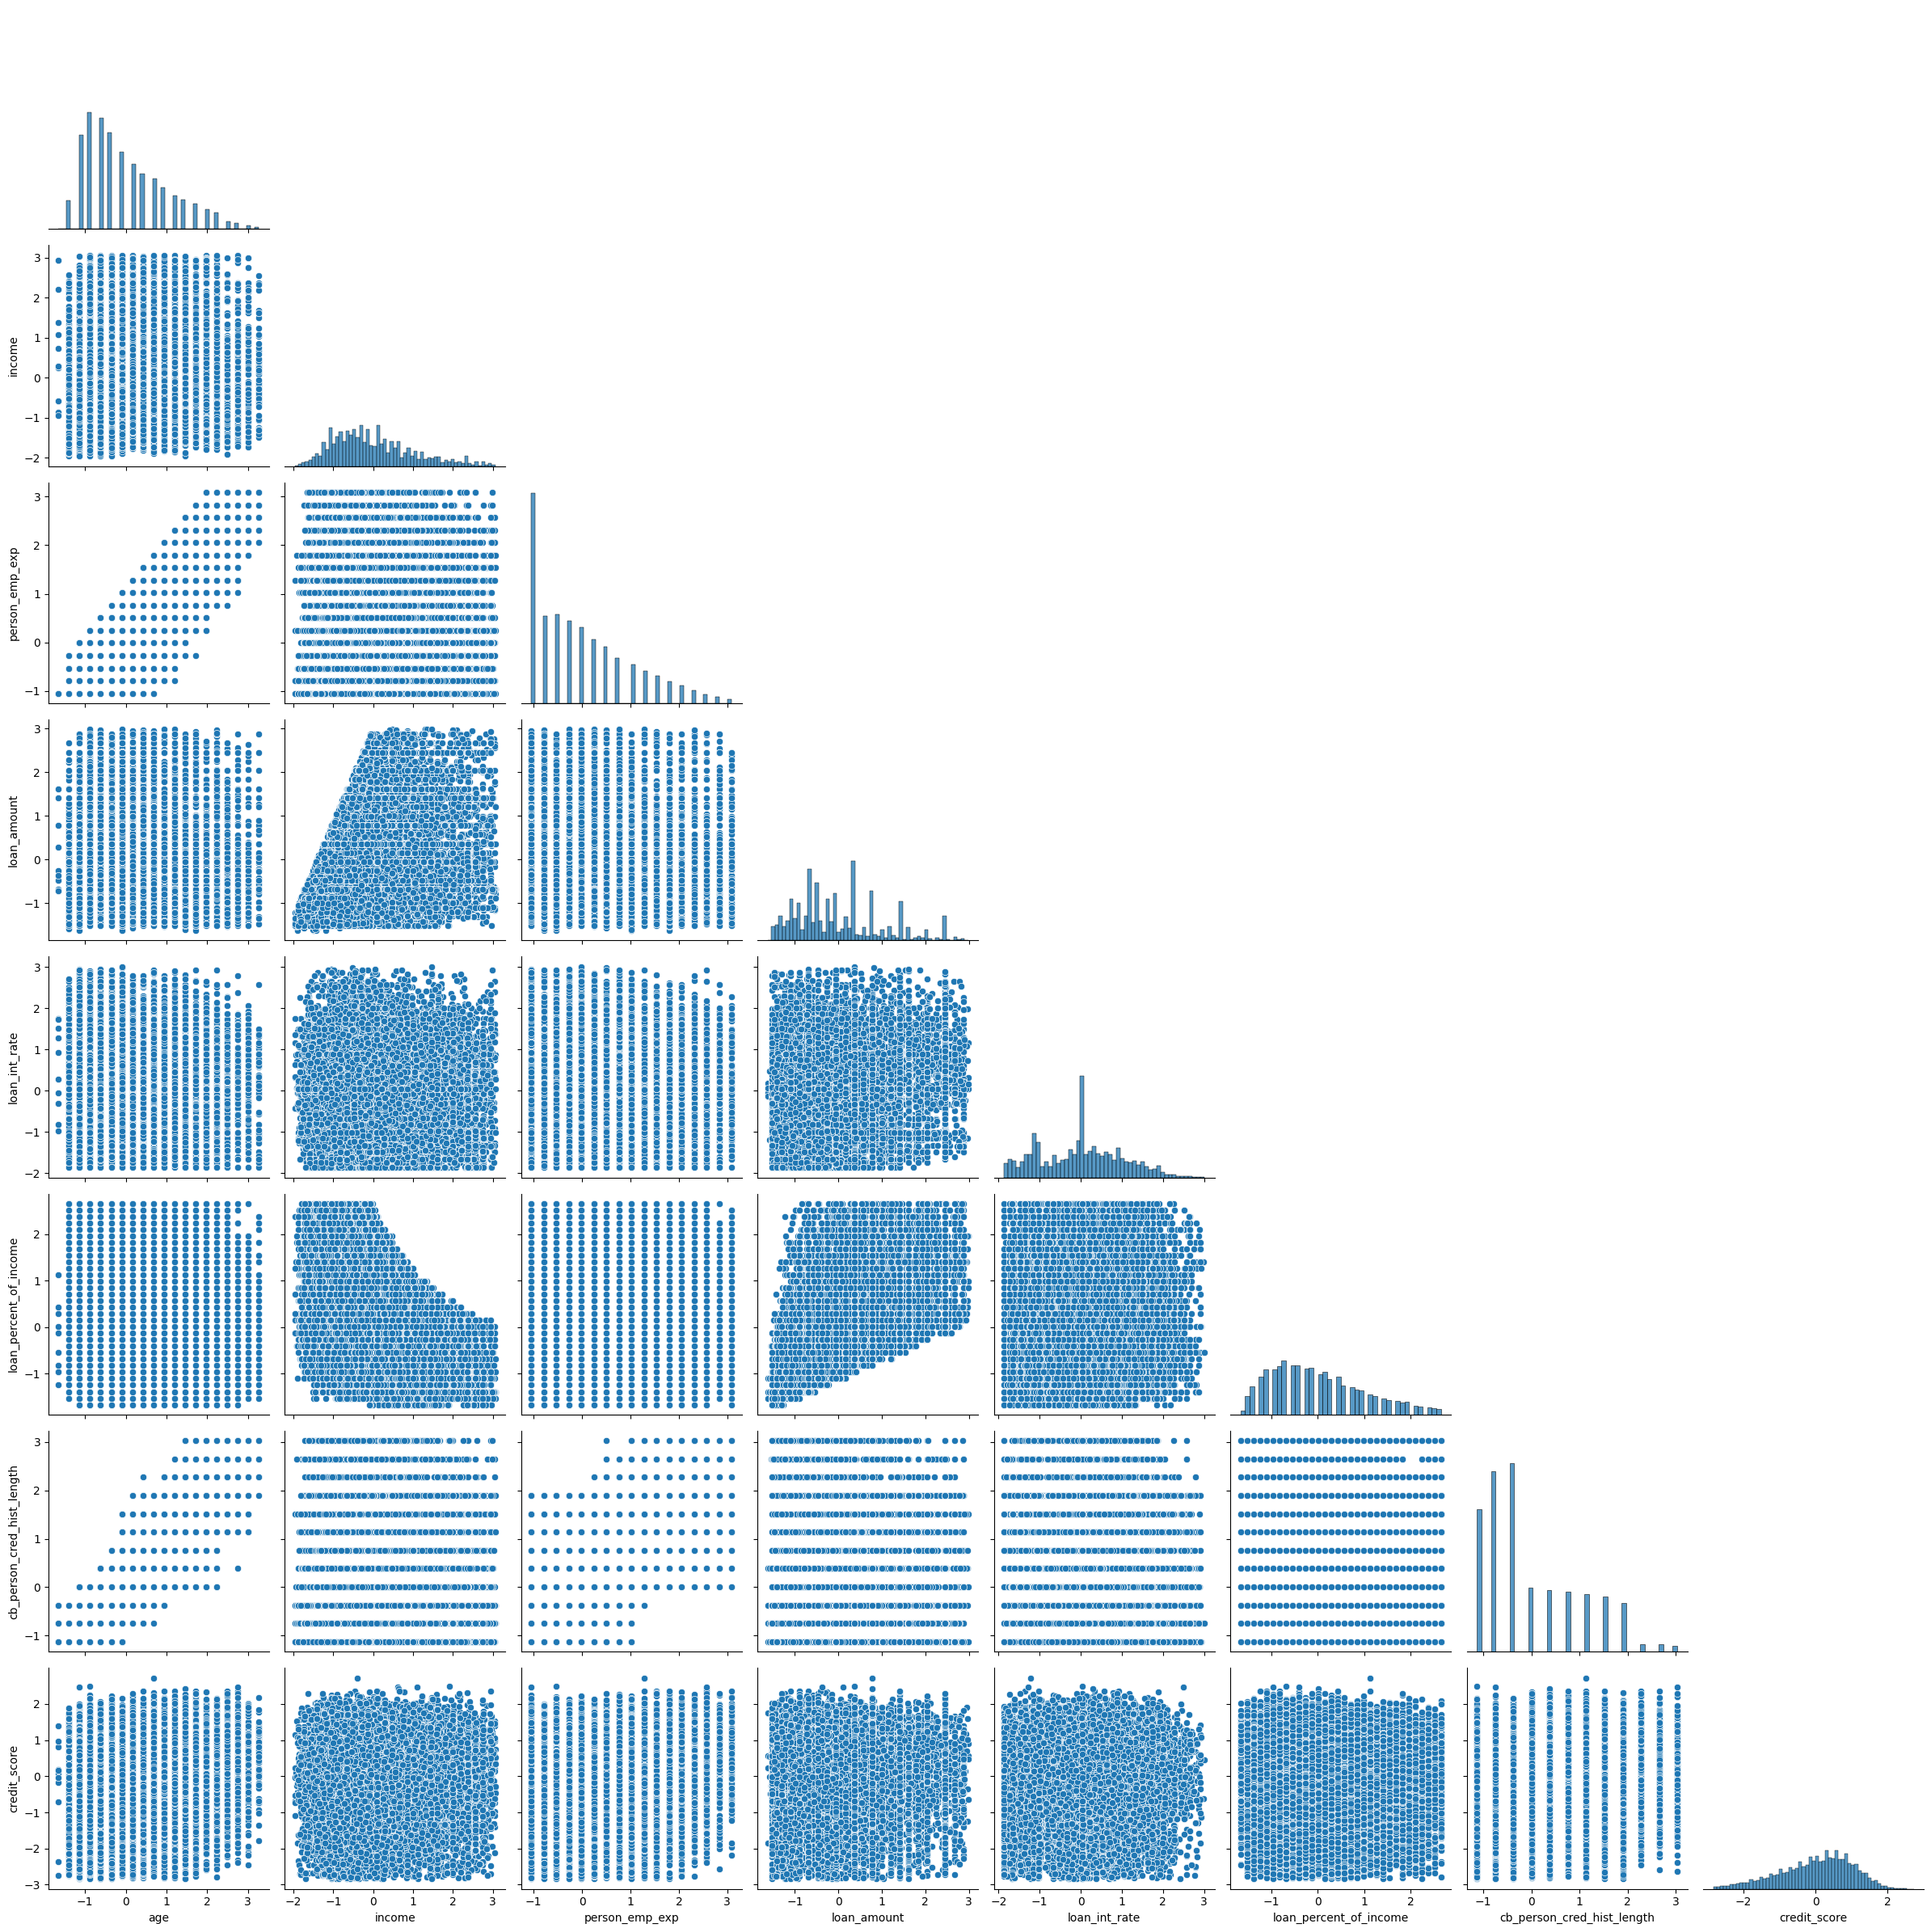

In [47]:
sns.pairplot(OHE_x_train[num_features], size=3, corner=True)

plt.tight_layout()
plt.show()

ML Model Selection

In [50]:
def train_predict(learner, sample_size, x_train, y_train, x_test, y_test):
    result= {}

    start= time()
    learner=learner.fit(x_train[:sample_size], y_train[:sample_size])
    end= time()
    result['train_time']= end-start

    start=time()
    predictions_test= learner.predict(x_test)
    predictions_train= learner.presict(x_train[:300])
    end= time()
    result['pred_time']= end - start

    result['accuracy_train']= accuracy_score(y_train[:300],predictions_train)
    result['accuracy_test']= accuracy_score(y_test, predictions_test)

    result['recall_train']= recall_score(y_train[:300],predictions_train, average='macro')
    result['recall_test']= recall_score(y_test, predictions_test, average='macro')
    
    print("{} traind on {}".format(learner.__class__.__name__, sample_size))
    return result

In [51]:
#Initialize the three models
clf_A= GradientBoostingClassifier(random_state=42)
clf_B= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42))
clf_C= RandomForestClassifier(random_state=42) 
clf_D= XGBClassifier(random_state= 42)
clf_E=SVC(random_state=42)

samples_1= int(round(len(OHE_x_train) / 100))
samples_10= int(round(len(OHE_x_train) / 10))
samples_25= int(round(len(OHE_x_train) / 4))
samples_50= int(round(len(OHE_x_train) / 2))
samples_75= int(round(len(OHE_x_train) * 0.75))
samples_100= len(x_train)

results= {}
for clf in [clf_A, clf_B, clf_C , clf_D, clf_E]:
    clf_name= clf.__class__.__name__
    results[clf_name]= {}
    for i,samples in enumerate([samples_1, samples_10, samples_25, samples_50, samples_75, samples_100]):
        results[clf_name][i]= \
        train_predict(clf, samples, OHE_x_train, y_train, OHE_x_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- income_group


In [52]:
for i in results.items:
    print(i[0])
    print(pd.DataFrame(i[1]).rename(columns={0: '%1', 1:'10', 2:'25', 3:'%50', 4:'%75', 5:'%100'}))

TypeError: 'builtin_function_or_method' object is not iterable